-------------------------------------------------------------------------------------------------------
# SCENARIO ANALYSIS: 
-------------------------------------------------------------------------------------------------------
## Baseline + Basic, Moderate, and Advanced Retrofit
## No IRA and IRA-Reference
-------------------------------------------------------------------------------------------------------

In [1]:
print("""
=====================================================================================================================================================================
SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
=====================================================================================================================================================================
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
""", "\n")


SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
 



In [2]:
from config import PROJECT_ROOT
print(f"Imported PROJECT_ROOT from config.py: {PROJECT_ROOT}")

from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Format the name of the exported results file using the location ID
result_export_time = datetime.now()
model_run_date_time = result_export_time.strftime("%Y-%m-%d_%H-%M")

Project root directory: c:\users\14128\research\cmu-tare-model
Imported PROJECT_ROOT from config.py: c:\users\14128\research\cmu-tare-model


In [3]:
import os
from IPython import get_ipython

import pandas as pd

# Data Visualization Functions
from cmu_tare_model.utils.data_visualization import *

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['font.family'] = 'sans-serif' # Set the font for Matplotlib
plt.rcParams['font.sans-serif'] = 'Arial' # Set the font for Matplotlib

# At the beginning of your notebook or script
plt.close('all')  # Close any existing figures before creating new ones
# For Jupyter notebooks, ensure you have this at the top
%matplotlib inline

# Seaborn
import seaborn as sns
sns.set_theme(font='sans-serif', style='darkgrid') # Set the font and grid style for Seaborn

In [4]:
# pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [5]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        print(f"Enter the following input: {start_new_model_run}")

        if start_new_model_run == 'Y':
            print(f"Formatted date for use in file name: {model_run_date_time}")

            print(f"Project root directory: {PROJECT_ROOT}")

            # Relative path to the file from the project root
            relative_path = os.path.join("cmu_tare_model", "model_scenarios", "tare_run_simulation_v2_1.ipynb")

            # Construct the absolute path to the file
            file_path = os.path.join(PROJECT_ROOT, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")

            # On Windows, to avoid any path-escape quirks, convert backslashes to forward slashes
            file_path = file_path.replace("\\", "/")

            print(f"Running file: {file_path}")

            # iPthon magic command to run a .py file and import variables into the current IPython session
            if os.path.exists(file_path):
                get_ipython().run_line_magic('run', f'-i {file_path}')  # If your path has NO spaces, no quotes needed.
            else:
                print(f"File not found: {file_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {PROJECT_ROOT}")
            
            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    # except Exception as e:
    #     print("Invalid input. Please try again.")

    except Exception as e:
        print("An error occurred:", e)
        print("Please try again.")


Enter the following input: Y
Formatted date for use in file name: 2025-06-14_19-06
Project root directory: c:\users\14128\research\cmu-tare-model
File path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\model_scenarios\tare_run_simulation_v2_1.ipynb
Result outputs will be exported here: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results
Running file: c:/users/14128/research/cmu-tare-model/cmu_tare_model/model_scenarios/tare_run_simulation_v2_1.ipynb

The results will be exported using the export_model_run_output function.
Documentation for this function:
Export data for various result categories to appropriate directories.
    
    This function exports DataFrame results to CSV files in the appropriate 
    directory based on the results category and measure package. It supports
    the expanded sensitivity analysis categories and directory structure.
    
    Args:
        df_results_export: DataFrame containing the data to be exported.
        results_catego

In [6]:
# =======================================================================================================
# LOAD SCENARIO DATA: ORIGINAL APPROACH FOR REFERENCE (MP8)
# =======================================================================================================
# scenario_string = 'retrofit_basic_summary'
# df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# ... and so on
from cmu_tare_model.utils.load_exported_results_to_df import load_scenario_data

print(f"""
====================================================================================================================================================================
LOAD SCENARIO DATA
====================================================================================================================================================================
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
{load_scenario_data.__doc__}

-----------------------------------------------------------------------------------------------
LOADING SCENARIO DATA ...

These parameters are common to all function calls:
Output folder path: {output_folder_path}
Model run date time: {model_run_date_time}
""")


LOAD SCENARIO DATA
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
Load scenario data from a specified folder and date.
    
    This function searches for files matching the given scenario and date
    in the specified folder path, and loads the first matching file as a
    pandas DataFrame. Includes optional chunked loading for memory efficiency
    when working with large datasets.
    
    Args:
        end_use: Description of the data being loaded (used for logging).
        output_folder_path: Base path where scenario folders are located.
        scenario_string: Path to the scenario data (can include subdirectories).
        model_run_date_time: Date/time string to filter files by (must be in filename).
        columns_to_string: Dictionary mapping column names/indices to string dtypes.
            Supports both string keys (column names) and in

-------------------------------------------------------------------------------------------------------
# Baseline Scenario: Measure Package 0 (MP0)
-------------------------------------------------------------------------------------------------------

In [7]:
# =======================================================================================================
# Baseline Scenario: Measure Package 0 (MP0)
# =======================================================================================================
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp = 0

scenario_string = 'baseline_summary\summary_baseline'

print(f"""
=======================================================================================================
Baseline Scenario: Measure Package 0 (MP0)
=======================================================================================================
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_baseline_home)


Baseline Scenario: Measure Package 0 (MP0)
Scenario Relative Path: baseline_summary\summary_baseline
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\baseline_summary\summary_baseline
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 126)
Loaded Whole-Home data for policy_scenario 'baseline_summary\summary_baseline' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273              1690.0         South  East South Central   
307              1220.0         South  East South Central   
409              1220.0         South  East South Central   
517              1220.0         South  East South Central   
...                 

-------------------------------------------------------------------------------------------------------
# Basic Retrofit: Measure Package 8 (MP8)
-------------------------------------------------------------------------------------------------------

In [8]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp=8

# ========================== BASIC-AP2  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_ap2)

# ========================== BASIC-EASIUR  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_easiur)

# ========================== BASIC-InMAP ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_inmap)


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_basic_summary/summary_basic_ap2
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_basic_summary/summary_basic_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 770)
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary/summary_basic_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South C

-------------------------------------------------------------------------------------------------------
# Moderate Retrofit: Measure Package 9 (MP9)
-------------------------------------------------------------------------------------------------------

In [9]:
# =======================================================================================================
# MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp = 9

# ========================== MODERATE-AP2  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_ap2'

print(f"""
=======================================================================================================
MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_ap2)

# ========================== MODERATE-EASIUR  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_easiur)

# ========================== MODERATE-InMAP ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_inmap)


MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_moderate_summary/summary_moderate_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_moderate_summary/summary_moderate_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 786)
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary/summary_moderate_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273   

-------------------------------------------------------------------------------------------------------
# Advanced Retrofit: Measure Package 10 (MP10)
-------------------------------------------------------------------------------------------------------

In [ ]:
# =======================================================================================================
# ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str, 158: str, 159: str, 213: str}
menu_mp = 10

# ========================== ADVANCED-AP2  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_ap2'

print(f"""
=======================================================================================================
ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_ap2)

# ========================== ADVANCED-EASIUR  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_easiur)

# ========================== ADVANCED-InMAP ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_inmap)


ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_advanced_summary/summary_advanced_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_advanced_summary/summary_advanced_ap2
Loading Whole-Home data in chunks of 50,000 rows...


c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.

  Loaded chunk 5 (50,000 rows)


c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:


  Successfully combined 7 chunks into DataFrame with shape (331531, 801)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273              1690.0         South  East South Central   
307              1220.0         South  East South Central   
409              1220.0         South  East South Central   
517              1220.0         South  East South Central   
...                 ...           ...                 ...   
548226           2176.0          West            Mountain   
548228           1690.0          West            Mountain   
548417            885.0          West            Mountain   
549740           1220.0          West            Mountain   
549938            885.0          West            Mountain   

        census_division_recs building_a

c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.

  Loaded chunk 5 (50,000 rows)


c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:


  Successfully combined 7 chunks into DataFrame with shape (331531, 801)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_easiur' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273              1690.0         South  East South Central   
307              1220.0         South  East South Central   
409              1220.0         South  East South Central   
517              1220.0         South  East South Central   
...                 ...           ...                 ...   
548226           2176.0          West            Mountain   
548228           1690.0          West            Mountain   
548417            885.0          West            Mountain   
549740           1220.0          West            Mountain   
549938            885.0          West            Mountain   

        census_division_recs buildin

c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.

  Loaded chunk 5 (50,000 rows)


c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:
c:\users\14128\research\cmu-tare-model\cmu_tare_model\utils\load_exported_results_to_df.py:80: DtypeWarning: Columns (21,159) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_reader:


  Successfully combined 7 chunks into DataFrame with shape (331531, 801)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_inmap' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273              1690.0         South  East South Central   
307              1220.0         South  East South Central   
409              1220.0         South  East South Central   
517              1220.0         South  East South Central   
...                 ...           ...                 ...   
548226           2176.0          West            Mountain   
548228           1690.0          West            Mountain   
548417            885.0          West            Mountain   
549740           1220.0          West            Mountain   
549938            885.0          West            Mountain   

        census_division_recs building

# Adoption Rate Scenario Comparison

In [11]:
from cmu_tare_model.adoption_potential.determine_adoption_potential_sensitivity_robust import * 
from cmu_tare_model.adoption_potential.data_processing.visuals_adoption_potential import (
    create_multiIndex_adoption_df,
    print_adoption_decision_percentages,
    subplot_grid_adoption_vBar
)

print(f"""  
====================================================================================================================================================================
ADOPTION POTENTIAL VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)
      
Documentation for the adoption_decision function:
{adoption_decision.__doc__}

Documentation for the calculate_climate_only_adoption_robust function:
{calculate_climate_only_adoption_robust.__doc__}

Documentation for the calculate_health_only_adoption_robust function:
{calculate_health_only_adoption_robust.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
CREATE MULTI-INDEX DF FOR ADOPTION POTENTIAL
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the create_multiIndex_adoption_df function.

Documentation for the create_multiIndex_adoption_df function:
{create_multiIndex_adoption_df.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
VISUALIZE ADOPTION POTENTIAL SUBPLOT GRID
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the subplot_grid_adoption_vBar function.
      
Documentation for the subplot_grid_adoption_vBar function:
{subplot_grid_adoption_vBar.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

""")

  
ADOPTION POTENTIAL VISUALIZATION

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)
      
Documentation for the adoption_decision function:

    Updates DataFrame with adoption decisions and public impacts based on NPV analysis.
    
    Simplified output for nation-level analysis while maintaining full functionality.
    
    Args:
        df: DataFrame containing home equipment data.
        menu_mp: Measure package identifier.
        policy_scenario: Policy scenario for electricity grid projections.
            Accepted values: 'No Inflation Reduction Act', 'AEO2023 Reference Case'.
        rcm_model: RC

## Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit


In [12]:
# =======================================================================================================
# SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# =======================================================================================================
# Common parameters
scc = 'central'

# ========================== AP2  ========================== 
rcm_model = 'ap2'

print(f"""
Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: {scc}
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== EASIUR  ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'h6c')


Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: central
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM

In [13]:
df_mi_basic_heating_adoption_inmap_acs

preIRA_mp8_heating_adoption_central_inmap_acs  \
                                                          Tier 1: Feasible   
base_heating_fuel lmi_or_mui                                                 
Electricity       LMI                                                  6.0   
                  MUI                                                  7.0   
Fuel Oil          LMI                                                 11.0   
                  MUI                                                 12.0   
Natural Gas       LMI                                                  0.0   
                  MUI                                                  0.0   
Propane           LMI                                                  4.0   
                  MUI                                                  5.0   

                                                               \
                             Tier 2: Feasible vs. Alternative   
base_heating_fuel lmi_or_mui                                    
Electricity       LMI                                    12.0   
                  MUI                                    12.0   
Fuel Oil          LMI                                    18.0   
                  MUI                                    17.0   
Natural Gas       LMI                                     0.0   
                  MUI                                     0.0   
Propane           LMI                                     4.0   
                  MUI                                     4.0   

                                                                    \
                             Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lmi_or_mui                                         
Electricity       LMI                                         28.0   
                  MUI                                         27.0   
Fuel Oil          LMI                                         62.0   
                  MUI                                         64.0   
Natural Gas       LMI                                         22.0   
                  MUI                                         23.0   
Propane           LMI                                         27.0   
                  MUI                                         25.0   

                                                       \
                             Total Adoption Potential   
base_heating_fuel lmi_or_mui                            
Electricity       LMI                            18.0   
                  MUI                            19.0   
Fuel Oil          LMI                            29.0   
                  MUI                            29.0   
Natural Gas       LMI                             0.0   
                  MUI                             0.0   
Propane           LMI                             8.0   
                  MUI                             9.0   

                                                                            \
                             Total Adoption Potential (Additional Subsidy)   
base_heating_fuel lmi_or_mui                                                 
Electricity       LMI                                                 46.0   
                  MUI                                                 46.0   
Fuel Oil          LMI                                                 91.0   
                  MUI                                                 93.0   
Natural Gas       LMI                                                 22.0   
                  MUI                                                 23.0   
Propane           LMI                                                 35.0   
                  MUI                                                 34.0   

                             iraRef_mp8_heating_adoption_central_inmap_acs  \
                                                          Tier 1: Feasible   
base_heating_fuel lmi_or_mui            

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Optional, Tuple, Dict, Any, Union

# =========================================================================
# FUNCTIONS: VISUALIZATION USING DATAFRAMES AND SUBPLOTS
# =========================================================================

def create_multiIndex_adoption_df(
        df: pd.DataFrame,
        menu_mp: int,
        category: str,
        scc: str,
        rcm_model: str,
        cr_function: str
) -> pd.DataFrame:
    """
    Creates a multi-index DataFrame showing adoption percentages by LMI/MUI classification and fuel type.
    
    Args:
        df: DataFrame with adoption data
        menu_mp: Measure package identifier
        category: Equipment category
        scc: Social cost of carbon assumption
        rcm_model: RCM model
        cr_function: Concentration-response function
        
    Returns:
        Multi-index DataFrame with adoption percentages
        
    Raises:
        ValueError: If required columns are not found in the DataFrame
    """
    # Define LMI/MUI categories for sorting
    lmi_mui_categories = ['LMI', 'MUI']
    
    # Validate that the required column exists
    if 'lmi_or_mui' not in df.columns:
        raise ValueError("Required column 'lmi_or_mui' not found in DataFrame. "
                        "Please ensure the DataFrame has been processed with the updated calculate_percent_AMI function.")
    
    # Convert to categorical for proper sorting
    df['lmi_or_mui'] = pd.Categorical(
        df['lmi_or_mui'],
        categories=lmi_mui_categories,
        ordered=True
    )
    
    # Define column names with sensitivity dimensions
    adoption_cols = [
        f'preIRA_mp{menu_mp}_{category}_adoption_{scc}_{rcm_model}_{cr_function}',
        f'iraRef_mp{menu_mp}_{category}_adoption_{scc}_{rcm_model}_{cr_function}'
    ]
    
    # Try backward compatibility if needed
    if not all(col in df.columns for col in adoption_cols):
        old_cols = [
            f'preIRA_mp{menu_mp}_{category}_adoption_lrmer',
            f'iraRef_mp{menu_mp}_{category}_adoption_lrmer'
        ]
        
        if all(col in df.columns for col in old_cols):
            adoption_cols = old_cols
            print(f"Using backward-compatible column names for {category}")
        else:
            available_cols = [col for col in df.columns if 'adoption' in col]
            raise ValueError(f"Required adoption columns not found for {category}. "
                           f"Expected: {adoption_cols}. Available adoption columns: {available_cols}")
    
    try:
        # Group by fuel and LMI/MUI classification, calculate normalized counts
        percentages_df = df.groupby(
            [f'base_{category}_fuel', 'lmi_or_mui'],
            observed=False
        )[adoption_cols].apply(
            lambda x: x.apply(lambda y: y.value_counts(normalize=True))
        ).unstack().fillna(0) * 100
        
        percentages_df = percentages_df.round(0)
    except Exception as e:
        raise ValueError(f"Error calculating percentages for {category}: {str(e)}. "
                        f"Check that required columns exist and contain expected values.")
    
    # Ensure all tiers exist, add if missing
    tiers = [
        'Tier 1: Feasible', 
        'Tier 2: Feasible vs. Alternative', 
        'Tier 3: Subsidy-Dependent Feasibility'
    ]
    
    for column in adoption_cols:
        # Add missing tiers with zero values
        for tier in tiers:
            if (column, tier) not in percentages_df.columns:
                percentages_df[(column, tier)] = 0
        
        # Calculate adoption potential totals
        percentages_df[(column, 'Total Adoption Potential')] = (
            percentages_df[(column, 'Tier 1: Feasible')] + 
            percentages_df[(column, 'Tier 2: Feasible vs. Alternative')]
        )
        
        percentages_df[(column, 'Total Adoption Potential (Additional Subsidy)')] = (
            percentages_df[(column, 'Tier 1: Feasible')] + 
            percentages_df[(column, 'Tier 2: Feasible vs. Alternative')] + 
            percentages_df[(column, 'Tier 3: Subsidy-Dependent Feasibility')]
        )
    
    # Rebuild the MultiIndex and filter columns
    percentages_df.columns = pd.MultiIndex.from_tuples(percentages_df.columns)
    
    # Keep only columns with tiers and totals
    keep_tiers = tiers + ['Total Adoption Potential', 'Total Adoption Potential (Additional Subsidy)']
    keep_cols = [(col, tier) for col in adoption_cols for tier in keep_tiers 
                if (col, tier) in percentages_df.columns]
    
    if keep_cols:
        filtered_df = percentages_df.loc[:, keep_cols]
    else:
        print(f"Warning: No tier columns found for {category}")
        return percentages_df  # Return unfiltered if no tiers found

    # Sort by index (fuel type and LMI/MUI classification)
    filtered_df.sort_index(level=[f'base_{category}_fuel', 'lmi_or_mui'], inplace=True)

    # Filter to include only specific fuel types
    allowed_fuels = ['Electricity', 'Fuel Oil', 'Natural Gas', 'Propane']
    fuel_level = f'base_{category}_fuel'
    if isinstance(filtered_df.index, pd.MultiIndex) and fuel_level in filtered_df.index.names:
        filtered_df = filtered_df[filtered_df.index.get_level_values(fuel_level).isin(allowed_fuels)]

    return filtered_df


def plot_adoption_rate_bar(
    df: pd.DataFrame,
    scenarios: List[str],
    title: str,
    x_label: str,
    y_label: str,
    ax: plt.Axes,
    x_tick_format: str = "lmi_only"  # Updated default to reflect LMI/MUI usage
) -> None:
    """
    Plots stacked bar chart for adoption tiers on the given axes.
    
    Args:
        df: DataFrame with multi-index structure containing adoption data
        scenarios: List of scenario column names (without tier part)
        title: Title for the plot
        x_label: Label for x-axis
        y_label: Label for y-axis
        ax: Matplotlib axes to plot on
        x_tick_format: Format for x-tick labels. Options:
                      "lmi_only" - Show only LMI/MUI classification
                      "fuel_only" - Show only fuel type
                      "combined" - Show "Fuel Type, LMI/MUI"
                      "all" - Show all index levels separated by commas
        
    Returns:
        None. The plot is created on the provided axes.
        
    Raises:
        ValueError: If required columns are not found in the DataFrame
    """
    # Define the color mapping for adoption tiers
    color_mapping = {
        'Tier 1: Feasible': 'steelblue',
        'Tier 2: Feasible vs. Alternative': 'lightblue',
        'Tier 3: Subsidy-Dependent Feasibility': 'lightsalmon'
    }
    
    # Ensure the DataFrame is properly formatted
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame must have a MultiIndex for columns")
    
    # Filter the DataFrame to only include the tier columns
    tier_columns = ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility']
    available_columns = df.columns.get_level_values(1).unique()
    
    if not any(tier in available_columns for tier in tier_columns):
        raise ValueError(f"No tier columns found in DataFrame. Available columns: {available_columns}")
    
    adoption_data = df.loc[:, df.columns.get_level_values(1).isin(tier_columns)]
    
    # Remove unused levels to clean up the columns
    adoption_data.columns = adoption_data.columns.remove_unused_levels()
    
    # Plotting setup
    n = len(adoption_data.index)
    bar_width = 0.35  # Width of bars
    index = list(range(n))  # Base index for bars
    
    for i, scenario in enumerate(scenarios):
        try:
            # Find tier columns for this scenario
            tier1_col = None
            tier2_col = None
            tier3_col = None
            
            # Look through all available columns to find matches for this scenario
            for col in adoption_data.columns:
                # Check if the scenario is in the column name (for flexible matching)
                if scenario in col[0]:
                    if col[1] == 'Tier 1: Feasible':
                        tier1_col = col
                    elif col[1] == 'Tier 2: Feasible vs. Alternative':
                        tier2_col = col
                    elif col[1] == 'Tier 3: Subsidy-Dependent Feasibility':
                        tier3_col = col
            
            # Verify we found all needed columns
            if tier1_col and tier2_col and tier3_col:
                tier1 = adoption_data[tier1_col].values
                tier2 = adoption_data[tier2_col].values
                tier3 = adoption_data[tier3_col].values
                
                # Adjust the index for this scenario
                scenario_index = np.array(index) + i * bar_width
                
                # Plot the stacked bars for the scenario
                ax.bar(
                    scenario_index, 
                    tier1, 
                    bar_width, 
                    color=color_mapping['Tier 1: Feasible'], 
                    edgecolor='white',
                    label='Tier 1: Feasible' if i == 0 else ""  # Only label once for legend
                )
                ax.bar(
                    scenario_index, 
                    tier2, 
                    bar_width, 
                    bottom=tier1, 
                    color=color_mapping['Tier 2: Feasible vs. Alternative'], 
                    edgecolor='white',
                    label='Tier 2: Feasible vs. Alternative' if i == 0 else ""
                )
                ax.bar(
                    scenario_index, 
                    tier3, 
                    bar_width, 
                    bottom=(tier1+tier2), 
                    color=color_mapping['Tier 3: Subsidy-Dependent Feasibility'], 
                    edgecolor='white',
                    label='Tier 3: Subsidy-Dependent Feasibility' if i == 0 else ""
                )
            else:
                print(f"Warning: Missing tier columns for scenario {scenario}")
                print(f"Available columns: {adoption_data.columns.tolist()}")
                
        except Exception as e:
            print(f"Error plotting scenario {scenario}: {str(e)}")
    
    # Set axis labels and title
    ax.set_xlabel(x_label, fontweight='bold', fontsize=24)
    ax.set_ylabel(y_label, fontweight='bold', fontsize=24)
    ax.set_title(title, fontweight='bold', fontsize=24)

    # Set x-ticks and labels
    if n > 0:
        ax.set_xticks([i + bar_width / 2 for i in range(n)])
        
        # Format x-tick labels based on index structure and format choice
        if isinstance(adoption_data.index, pd.MultiIndex):
            # Format tick labels based on the selected format
            if x_tick_format == "lmi_only" and adoption_data.index.nlevels > 1:
                # Use only the second level (LMI/MUI classification)
                ax.set_xticklabels([name[1] for name in adoption_data.index.tolist()], 
                                   rotation=90, ha='right')
            
            elif x_tick_format == "fuel_only" and adoption_data.index.nlevels > 0:
                # Use only the first level (fuel type)
                ax.set_xticklabels([name[0] for name in adoption_data.index.tolist()], 
                                   rotation=90, ha='right')
            
            elif x_tick_format == "combined" and adoption_data.index.nlevels > 1:
                # Combine first two levels with comma separator
                tick_labels = [f"{name[0]}, {name[1]}" for name in adoption_data.index.tolist()]
                ax.set_xticklabels(tick_labels, rotation=90, ha='right')
            
            elif x_tick_format == "all":
                # Combine all available levels with comma separators
                tick_labels = []
                for idx in adoption_data.index.tolist():
                    if isinstance(idx, tuple):
                        tick_labels.append(", ".join(str(x) for x in idx))
                    else:
                        tick_labels.append(str(idx))
                ax.set_xticklabels(tick_labels, rotation=90, ha='right')
            
            else:
                # Default: use the full index as is
                ax.set_xticklabels(adoption_data.index.tolist(), rotation=90, ha='right')
        else:
            # For non-MultiIndex, just use the index values
            ax.set_xticklabels(adoption_data.index.tolist(), rotation=90, ha='right')
    
    # Set font size for tick labels
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    
    # Set y-ticks from 0 to 100 in steps of 10%
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylim(0, 100)


def subplot_grid_adoption_vBar(
    dataframes: List[pd.DataFrame],
    scenarios_list: List[List[str]],
    subplot_positions: List[Tuple[int, int]],
    filter_fuel: Optional[List[str]] = None,
    x_labels: Optional[List[str]] = None,
    plot_titles: Optional[List[str]] = None,
    y_labels: Optional[List[str]] = None,
    suptitle: Optional[str] = None,
    figure_size: Tuple[int, int] = (12, 10),
    sharex: bool = False,
    sharey: bool = False,
    x_tick_format: str = "lmi_only"  # New parameter to control x-tick formatting across all subplots
) -> plt.Figure:
    """
    Creates a grid of subplots to visualize adoption rates across different scenarios using LMI/MUI classification.
    
    Args:
        dataframes: List of DataFrames, each formatted for use in plot_adoption_rate_bar
        scenarios_list: List of scenario identifiers for each DataFrame
        subplot_positions: Positions of subplots in grid as (row, col) tuples
        filter_fuel: Optional list of fuel types to filter by
        x_labels: Optional labels for x-axis of each subplot
        plot_titles: Optional titles for each subplot
        y_labels: Optional labels for y-axis of each subplot
        suptitle: Optional central title for entire figure
        figure_size: Size of entire figure (width, height) in inches
        sharex: Whether subplots should share same x-axis
        sharey: Whether subplots should share same y-axis
        x_tick_format: Format for x-tick labels across all subplots. Options:
                      "lmi_only", "fuel_only", "combined", "all"
        
    Returns:
        Matplotlib Figure object containing the visualization
        
    Raises:
        ValueError: If inputs are incompatible or improperly formatted
    """
    # Define the color mapping for adoption tiers
    color_mapping = {
        'Tier 1: Feasible': 'steelblue',
        'Tier 2: Feasible vs. Alternative': 'lightblue',
        'Tier 3: Subsidy-Dependent Feasibility': 'lightsalmon'
    }

    # Validate input lengths
    if not (len(dataframes) == len(scenarios_list) == len(subplot_positions)):
        raise ValueError("Length mismatch: dataframes, scenarios_list, and subplot_positions must have the same length")
    
    # Determine grid dimensions from subplot positions
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    # Create figure and axes
    # fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)    
    fig, axes = plt.subplots(
        nrows=num_rows,
        ncols=num_cols,
        figsize=figure_size,
        sharex=sharex,
        sharey=sharey,
        dpi=600  # High resolution for better quality!
    )

    # Ensure axes is always 2D for consistent indexing
    if num_rows == 1 and num_cols == 1:
        axes = np.array([[axes]])
    elif num_rows == 1:
        axes = np.array([axes])
    elif num_cols == 1:
        axes = np.array([[ax] for ax in axes])
    else:
        axes = np.array(axes)

    for idx, (df, scenarios) in enumerate(zip(dataframes, scenarios_list)):
        try:
            # Get the subplot position
            pos = subplot_positions[idx]
            ax = axes[pos[0], pos[1]]
            
            # Apply additional fuel filtering if requested
            # (create_multiIndex_adoption_df already filters, but this allows further filtering)
            filtered_df = df.copy()
            if filter_fuel:
                # Check if fuel is in index and filter
                fuel_level_names = [name for name in df.index.names if 'fuel' in name.lower()]
                if fuel_level_names:
                    fuel_level = fuel_level_names[0]
                    filtered_df = filtered_df[filtered_df.index.get_level_values(fuel_level).isin(filter_fuel)]
            
            # Set labels and title if provided
            x_label = x_labels[idx] if x_labels and idx < len(x_labels) else ""
            y_label = y_labels[idx] if y_labels and idx < len(y_labels) else ""
            title = plot_titles[idx] if plot_titles and idx < len(plot_titles) else ""
            
            # Plot the data with consistent x-tick formatting
            plot_adoption_rate_bar(filtered_df, scenarios, title, x_label, y_label, ax, x_tick_format)
            
        except Exception as e:
            print(f"Error plotting subplot at position {pos}: {str(e)}")
            # Create an empty plot with error message
            ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])

    # Add a title to the entire figure if provided
    if suptitle:
        fig.suptitle(suptitle, fontweight='bold', fontsize=26)

    # Add a legend for the color mapping at the bottom of the entire figure
    legend_labels = list(color_mapping.keys())
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[label]) for label in legend_labels]
            
    fig.legend(
        legend_handles, 
        legend_labels, 
        loc='lower center', 
        ncol=len(legend_labels), 
        prop={'size': 22}, 
        labelspacing=0.5, 
        bbox_to_anchor=(0.5, -0.10)
    )

    # First apply tight_layout with reasonable rect parameters
    plt.tight_layout(rect=[0, 0.02, 1, 0.98])
    
    # Add appropriate bottom padding for x-tick labels
    fig.subplots_adjust(bottom=0.25)
    
    # Loop through all axes to add more padding between tick labels and axis label
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i,j].xaxis.labelpad = 20  # Increase space between ticks and label

    return fig


def print_adoption_decision_percentages(
    dataframes: List[pd.DataFrame],
    scenario_names: List[str],
    title: str = None,
    subtitle: Optional[str] = None,
    print_header_key: bool = True,
    filter_fuel: Optional[List[str]] = None,
) -> None:
    """
    Print adoption decision percentages using the same logic as create_multiIndex_adoption_df.
    
    Args:
        dataframes: List of DataFrames with multi-index structure from create_multiIndex_adoption_df
        scenario_names: List of scenario names (e.g., ['Pre-IRA', 'IRA-Reference'])
        title: Section title
        subtitle: Optional subtitle for the section
        print_header_key: Whether to print the header key for the output
        filter_fuel: Optional list of fuels to include (uses same filtering as existing module)
    """
    
    # Define the mapping based on the existing module's tier structure
    tier_mapping = {
        'Tier 1: Feasible': 'AD',
        'Total Adoption Potential': 'TAD', 
        'Total Adoption Potential (Additional Subsidy)': 'TADS',
    }
    
    header_key = """(Base Fuel, Income Level): 
    AD (%):   --> Tier 1 (%): Adopters that recover the total capital cost of retrofit
    TAD (%):  --> Tier 1+2 (%): Adopters that recover either the total or net capital cost of retrofit
    TADS (%): --> Tier 1+2+3 (%): Both less and more WTP Adopters plus those that require subsidies to adopt (positive total NPV)
    """

    # Print header (matching user's desired format)
    if title is not None:
        print("-" * 80)
        print(f"{title.upper()}")
        print("-" * 80)

    if print_header_key:
        print(header_key)

    if subtitle is not None:
        print(f"\n{subtitle.upper()}\n")

    print(f"Scenarios: {' | '.join(scenario_names)}")
    print("-" * 80)
    
    # Process each dataframe and collect results
    all_results = {}
    
    for df, scenario_name in zip(dataframes, scenario_names):
        # Apply fuel filtering using the same logic as the existing module
        if filter_fuel is not None:
            # Use the same fuel filtering logic as subplot_grid_adoption_vBar
            fuel_level_names = [name for name in df.index.names if 'fuel' in name.lower()]
            if fuel_level_names:
                fuel_level = fuel_level_names[0]
                df = df[df.index.get_level_values(fuel_level).isin(filter_fuel)]
        
        # Find the scenario columns in the MultiIndex columns
        scenario_columns = [col for col in df.columns.get_level_values(0).unique() 
                          if scenario_name.lower().replace('-', '').replace('_', '') in 
                             col.lower().replace('-', '').replace('_', '')]
        
        if not scenario_columns:
            print(f"Warning: No columns found for scenario '{scenario_name}' in DataFrame")
            continue
            
        scenario_col = scenario_columns[0]  # Take the first matching column
        
        # Calculate overall percentages using the same approach as the module
        overall_percentages = []
        for tier, abbr in tier_mapping.items():
            if (scenario_col, tier) in df.columns:
                # Calculate mean across all groups (same as overall calculation)
                overall_pct = df[(scenario_col, tier)].mean()
                overall_percentages.append(f"{abbr} {overall_pct:.0f}%")
        
        overall_key = "('Overall')"
        if overall_key not in all_results:
            all_results[overall_key] = []
        all_results[overall_key].append(", ".join(overall_percentages))
        
        # Calculate percentages for each group using the existing index structure
        for group_idx in df.index:
            # Handle both single-level and multi-level indices
            if isinstance(group_idx, tuple):
                fuel, income = group_idx
                group_key = f"('{fuel}', '{income}')"
            else:
                group_key = f"('{group_idx}')"
            
            group_percentages = []
            for tier, abbr in tier_mapping.items():
                if (scenario_col, tier) in df.columns:
                    value = df.loc[group_idx, (scenario_col, tier)]
                    group_percentages.append(f"{abbr} {value:.0f}%")
            
            if group_key not in all_results:
                all_results[group_key] = []
            all_results[group_key].append(", ".join(group_percentages))
    
    # Print results in the same order as the existing module (Overall first, then sorted groups)
    for group_key, scenario_results in all_results.items():
        combined_results = " | ".join(scenario_results)
        print(f"{group_key}: {combined_results}")
    
    print()  # Add blank line after section

# scc = 'central'
# rcm_model = 'inmap'
# cr_function = 'acs'

# print_adoption_decision_percentages(
#         dataframes=[
#             df_mi_basic_heating_adoption_inmap_acs, df_mi_basic_heating_adoption_inmap_acs,
#             ],
#         scenario_names=[
#             f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
#             f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
#             ],
#         title="Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison",
#         subtitle="Basic Retrofit (MP8): Central SCC|InMAP|ACS",
#         print_header_key=True,
#     )

# print_adoption_decision_percentages(
#         dataframes=[
#             df_mi_moderate_heating_adoption_inmap_acs, df_mi_moderate_heating_adoption_inmap_acs,
#             ],
#         scenario_names=[
#             f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
#             f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
#             ],
#         title=None,
#         subtitle="Moderate Retrofit (MP9): Central SCC|InMAP|ACS",
#         print_header_key=False,
#     )

# print_adoption_decision_percentages(
#         dataframes=[
#             df_mi_advanced_heating_adoption_inmap_acs, df_mi_advanced_heating_adoption_inmap_acs
#             ],
#         scenario_names=[
#             f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
#             f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}'
#             ],
#         title=None,
#         subtitle="Advanced Retrofit (MP10): Central SCC|InMAP|ACS",
#         print_header_key=False,
#     )


In [124]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_inmap_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_inmap_acs,
        df_mi_moderate_heating_adoption_inmap_acs, 
        df_mi_advanced_heating_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP Only:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_inmap_acs

In [91]:
print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_heating_adoption_inmap_acs, df_mi_basic_heating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title="SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY", 
        subtitle="ASHP Only:\nNo IRA vs. IRA-Reference",
        print_header_key=True,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_moderate_heating_adoption_inmap_acs, df_mi_moderate_heating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title=None,
        subtitle="ASHP + Basic Enclosure:\nNo IRA vs. IRA-Reference",
        print_header_key=False,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_advanced_heating_adoption_inmap_acs, df_mi_advanced_heating_adoption_inmap_acs
            ],
        scenario_names=[
            f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}'
            ],
        title=None,
        subtitle="ASHP + Enhanced Enclosure:\nNo IRA vs. IRA-Reference",
        print_header_key=False,
    )

--------------------------------------------------------------------------------
SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
--------------------------------------------------------------------------------
(Base Fuel, Income Level): 
    AD (%):   --> Tier 1 (%): Adopters that recover the total capital cost of retrofit
    TAD (%):  --> Tier 1+2 (%): Adopters that recover either the total or net capital cost of retrofit
    TADS (%): --> Tier 1+2+3 (%): Both less and more WTP Adopters plus those that require subsidies to adopt (positive total NPV)
    

ASHP ONLY:
NO IRA VS. IRA-REFERENCE

Scenarios: preIRA_mp8_heating_adoption_central_inmap_acs | iraRef_mp8_heating_adoption_central_inmap_acs
--------------------------------------------------------------------------------
('Overall'): AD 6%, TAD 14%, TADS 49% | AD 12%, TAD 24%, TADS 62%
('Electricity', 'LMI'): AD 6%, TAD 18%, TADS 46% | AD 19%, TAD 44%, TADS 68%
('Electricity', 'MUI'): AD 7%, TAD 19%, 

## Water Heating, Clothes Drying, and Cooking - Basic Retrofit (MP8)

In [ ]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
menu_mp=8
scc = 'central'

# ========================== BASIC-AP2 ========================== 
rcm_model = 'ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-EASIUR ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'h6c')


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: easiur
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIV

In [126]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_inmap_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_inmap_acs,
        df_mi_basic_clothesDrying_adoption_inmap_acs, 
        df_mi_basic_cooking_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_inmap_acs_fuelIncome

In [17]:
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_waterHeating_adoption_inmap_acs, df_mi_basic_waterHeating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title="EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)",
        subtitle="Heat Pump Water Heater: Central SCC|InMAP|ACS",
        print_header_key=True,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_clothesDrying_adoption_inmap_acs, df_mi_basic_clothesDrying_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title=None,
        subtitle="Heat Pump Clothes Dryer: Central SCC|InMAP|ACS",
        print_header_key=False,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_cooking_adoption_inmap_acs, df_mi_basic_cooking_adoption_inmap_acs
            ],
        scenario_names=[
            f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}'
            ],
        title=None,
        subtitle="Electric Resistance Range: Central SCC|InMAP|ACS",
        print_header_key=False,
    )

--------------------------------------------------------------------------------
EQUIPMENT COMPARISON: WATER HEATING, CLOTHES DRYING, COOKING - BASIC RETROFIT (MP8)
--------------------------------------------------------------------------------
(Base Fuel, Income Level): 
    AD (%):   --> Tier 1 (%): Adopters that recover the total capital cost of retrofit
    TAD (%):  --> Tier 1+2 (%): Adopters that recover either the total or net capital cost of retrofit
    TADS (%): --> Tier 1+2+3 (%): Both less and more WTP Adopters plus those that require subsidies to adopt (positive total NPV)
    

HEAT PUMP WATER HEATER: CENTRAL SCC|INMAP|ACS

Scenarios: preIRA_mp8_waterHeating_adoption_central_inmap_acs | iraRef_mp8_waterHeating_adoption_central_inmap_acs
--------------------------------------------------------------------------------
('Overall'): AD 21%, TAD 51%, TADS 93% | AD 37%, TAD 69%, TADS 98%
('Electricity', 'LMI'): AD 23%, TAD 44%, TADS 83% | AD 64%, TAD 95%, TADS 99%
('Electricit

In [18]:
print(f""""
===================================================================================================================================================================
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========

""")
df_mi_basic_waterHeating_adoption_inmap_acs

"
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========




preIRA_mp8_waterHeating_adoption_central_inmap_acs  \
                                                                    Tier 1: Feasible   
base_waterHeating_fuel lmi_or_mui                                                      
Electricity            LMI                                                      23.0   
                       MUI                                                      32.0   
Fuel Oil               LMI                                                      26.0   
                       MUI                                                      35.0   
Natural Gas            LMI                                                       1.0   
                       MUI                                                       1.0   
Propane                LMI                                                      24.0   
                       MUI                                                      27.0   

                                                                    \
                                  Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lmi_or_mui                                    
Electricity            LMI                                    21.0   
                       MUI                                    23.0   
Fuel Oil               LMI                                    69.0   
                       MUI                                    61.0   
Natural Gas            LMI                                    15.0   
                       MUI                                    19.0   
Propane                LMI                                    17.0   
                       MUI                                    12.0   

                                                                         \
                                  Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lmi_or_mui                                         
Electricity            LMI                                         39.0   
                       MUI                                         35.0   
Fuel Oil               LMI                                          5.0   
                       MUI                                          4.0   
Natural Gas            LMI                                         78.0   
                       MUI                                         77.0   
Propane                LMI                                         48.0   
                       MUI                                         52.0   

                                                            \
                                  Total Adoption Potential   
base_waterHeating_fuel lmi_or_mui                            
Electricity            LMI                            44.0   
                       MUI                            55.0   
Fuel Oil               LMI                            95.0   
                       MUI                            96.0   
Natural Gas            LMI                            16.0   
                       MUI                            20.0   
Propane                LMI                            41.0   
                       MUI                            39.0   

                                                                                 \
                                  Total Adoption Potential (Additional Subsidy)   
base_waterHeating_fuel lmi_or_mui                                                 
Electricity            LMI                                                 83.0   
                       MUI                                                 90.0   
Fuel Oil               LMI                                                100.0   
                       MUI                                                100.0   
Natural Gas            LMI                                                 94.0   
                       MUI                                                 97.0   
Propane                LMI            

In [19]:
print(f""""
===================================================================================================================================================================
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========
{df_mi_basic_waterHeating_adoption_inmap_acs},

========== Heat Pump Clothes Dryer (MP8): ==========
{df_mi_basic_clothesDrying_adoption_inmap_acs},

========== Electric Resistance Range (MP8): ==========
{df_mi_basic_cooking_adoption_inmap_acs}

====================================================================================================================================================================
""")

"
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========
                                  preIRA_mp8_waterHeating_adoption_central_inmap_acs  \
                                                                    Tier 1: Feasible   
base_waterHeating_fuel lmi_or_mui                                                      
Electricity            LMI                                                      23.0   
                       MUI                                                      32.0   
Fuel Oil               LMI                                                      26.0   
                       MUI                                                      35.0   
Natural Gas            LMI                                                       1.0   
                       MUI                                                       1.0   
Propane                LMI                                                      24.0   
                       MUI   

# UNCERTAINTY ANALYSIS

In [20]:
from cmu_tare_model.utils.data_visualization import print_summary_stats
from cmu_tare_model.utils.data_visualization_boxplots import create_subplot_grid_boxplot
from cmu_tare_model.utils.data_visualization_histograms import create_subplot_grid_histogram, print_positive_percentages_complete

print(f"""  
====================================================================================================================================================================
UNCERTAINTY ANALYSIS VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the print_summary_stats function.
      
Documentation for the print_summary_stats function:
{print_summary_stats.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF BOXPLOTS
--------------------------------------------------------
data_visualization_boxplots.py file contains the definition for the create_subplot_grid_boxplot function.
      
Documentation for the create_subplot_grid_boxplot function:
{create_subplot_grid_boxplot.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF HISTOGRAMS
--------------------------------------------------------
data_visualization_histograms.py file contains the definition for the create_subplot_grid_histogram function.
      
Documentation for the create_subplot_grid_histogram function:
{create_subplot_grid_histogram.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
""")

  
UNCERTAINTY ANALYSIS VISUALIZATION

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the print_summary_stats function.
      
Documentation for the print_summary_stats function:

    Print summary statistics for each specified column across single or multiple DataFrames,
    with optional breakdown by fuel type.
    
    Uses pandas .describe() to provide descriptive statistics (count, mean, std, min, 
    quartiles, max). Useful for understanding data distributions before creating histograms.
    
    Args:
        df: Single DataFrame for backward compatibility
        dataframes: List of DataFrames for multi-DataFrame analysis
        dataframe_indices: List of indices mapping columns to DataFrames
        column_names: List of column names to analyze
        subplot_titles: Optional list of display titles for each column
        percent

## Climate Change Impact (SCC) and Tier 3 Adopters

### Space Heating - Progressive Impact of Climate Benefit Valuation

In [115]:
# =======================================================================================================
# UNCERTAINTY ANALYSIS: CLIMATE BENEFIT IMPACT ON RETROFIT ADOPTION POTENTIAL (TIER 3)
# =======================================================================================================
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_climate_scc_uncertainty = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2
        ],
    subplot_positions=[(0, 0), (0, 1), (0, 2), (0, 3)],  # 1x4 grid
    x_cols=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',
        f'{scenario_prefix}{category}_total_npv_climateOnly_lower',
        f'{scenario_prefix}{category}_total_npv_climateOnly_central',
        f'{scenario_prefix}{category}_total_npv_climateOnly_upper'
    ],
    x_labels=['Private NPV [2023 $USD]'] + ['Total NPV [2023 $USD]'] * 3,
    y_labels=['Dwelling Units', '', '', ''],
    bin_number=40,  # Optional: number of bins for histogram
    lower_percentile=0.5,    # Show nearly full range
    upper_percentile=99.5,   # Show nearly full range
    subplot_titles=[
        'Private NPV Only\n16% Positive NPV',
        'SCC Lower Bound\n24% Positive NPV',
        'SCC Central Estimate\n53% Positive NPV',
        'SCC Upper Bound\n67% Positive NPV' 
    ],
    # suptitle=f'{category.title()}: Progressive Impact of Climate Benefit Valuation',
    figure_size=(20, 10),  # Wide format for 4 panels
    sharex=False,  # Keep different scales to show full distributions
    sharey=True,   # Same y-scale for comparison
    color_code=f'base_{category}_fuel'
)


# Print comparison statistics
print("="*60)
print("PRIVATE vs PUBLIC NPV COMPARISON")
print("="*60)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,
    column_names=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',              # Private baseline
        f'{scenario_prefix}{category}_total_npv_climateOnly_lower',
        f'{scenario_prefix}{category}_total_npv_climateOnly_central',
        f'{scenario_prefix}{category}_total_npv_climateOnly_upper'
    ],
    subplot_titles=[
        'Private NPV Only (Baseline)', 
        'Lower Bound SCC (+ Climate)', 
        'Central Estimate SCC (+ Climate)', 
        'Upper Bound SCC (+ Climate)'
    ],
    fuel_column=f'base_{category}_fuel'
)

# plt.show()

PRIVATE vs PUBLIC NPV COMPARISON

===== Private NPV Only (Baseline) =====
All: 16.0% positive (41,394 of 259,268 values)
Electricity: 37.1% positive (27,127 of 73,186 values)
Natural Gas: 1.6% positive (2,478 of 155,560 values)
Propane: 17.0% positive (2,364 of 13,931 values)
Fuel Oil: 56.8% positive (9,425 of 16,591 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 10,174 of 331,531 total dataframe rows (3.1%).
NaN values in column: 72,263 rows (21.8% of dataframe)

===== Lower Bound SCC (+ Climate) =====
All: 23.5% positive (61,250 of 260,209 values)
Electricity: 46.5% positive (34,285 of 73,698 values)
Natural Gas: 7.1% positive (11,009 of 155,979 values)
Propane: 22.1% positive (3,075 of 13,941 values)
Fuel Oil: 77.6% positive (12,881 of 16,591 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 10,174 of 331,531 total dataframe rows (3.1%).
NaN values in column: 71,322 rows (21.5% of dataframe)

===== Central Estimate SCC (+ Climate)

# SENSITIVITY ANALYSIS: Public Health Impact with Different Reduced Complexity Models and Concentration Response Functions

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Optional, Tuple, Dict, Union
from matplotlib.ticker import FuncFormatter

from cmu_tare_model.constants import COLOR_MAP_FUEL

def thousands_formatter(
        x: float,
        pos: int) -> str:
    """Format numbers to use K for thousands automatically.
    
    Formats numeric values for axis labels, converting values >= 1000 to 
    use 'K' suffix (e.g., 2500 becomes '2.5K'). Used as a matplotlib 
    FuncFormatter for cleaner axis labels.
    
    Args:
        x: Numeric value to format
        pos: Position parameter required by matplotlib FuncFormatter (unused)
        
    Returns:
        Formatted string representation of the number
        
    Raises:
        TypeError: If x cannot be converted to a numeric value
    """
    # Validate input
    try:
        x_float = float(x)
    except (TypeError, ValueError):
        raise TypeError(f"Invalid input for formatting: {x}. Must be a numeric value.")
    
    # Format with 'K' for thousands
    if abs(x_float) >= 1000:
        return f'{x_float/1000:g}K'
    else:
        return f'{x_float:g}'


def create_subplot_grid_boxplot(
        df: Optional[pd.DataFrame] = None,
        dataframes: Optional[List[pd.DataFrame]] = None,
        dataframe_indices: Optional[List[int]] = None,
        subplot_positions: List[Tuple[int, int]] = None,
        y_cols: List[str] = None,
        category_col: Optional[str] = None,
        hue_col: str = 'base_fuel',
        x_labels: Optional[List[str]] = None,
        y_labels: Optional[List[str]] = None,
        lower_percentile: float = 1,
        upper_percentile: float = 99,
        show_outliers: bool = False,
        include_zero: bool = True,
        subplot_titles: Optional[List[str]] = None,
        suptitle: Optional[str] = None,
        figure_size: Tuple[int, int] = (12, 10),
        sharex: bool = False,
        sharey: bool = False,
        show_legend: bool = True,
        show_xtick_labels: bool = True) -> plt.Figure:
    """Creates a grid of boxplots with multiple fuel types grouped by category.
    
    This function creates a customizable grid of boxplots specifically designed for comparing
    distributions across different categories (e.g., income levels) and groups (e.g., fuel types).
    
    Args:
        df: Single DataFrame for backward compatibility
        dataframes: List of DataFrames for multi-DataFrame visualizations
        dataframe_indices: List of indices mapping subplot positions to DataFrames
        subplot_positions: List of (row, column) tuples for subplot placement
        y_cols: List of column names for y-axis (numeric data) in each subplot
        category_col: Column name for categories on x-axis (e.g., income level)
        hue_col: Column name for color coding (e.g., fuel type)
        x_labels: Optional list of x-axis labels for each subplot
        y_labels: Optional list of y-axis labels for each subplot
        lower_percentile: Lower percentile for data range filtering (0-100)
        upper_percentile: Upper percentile for data range filtering (0-100)
        show_outliers: Whether to show outliers in the boxplots
        include_zero: Whether to include zero values in the visualization
        subplot_titles: Optional list of titles for each subplot
        suptitle: Super title for the entire figure
        figure_size: Size of the figure as (width, height) in inches
        sharex: Whether to share x-axes across subplots
        sharey: Whether to share y-axes across subplots
        show_legend: Whether to show the fuel type legend
        show_xtick_labels: Whether to show x-tick labels (useful for large grids)
        
    Returns:
        Matplotlib Figure object containing the grid of boxplots
        
    Raises:
        ValueError: If input parameters are invalid or inconsistent
        KeyError: If specified columns don't exist in the DataFrame(s)
    """
    # Use default palette
    palette = COLOR_MAP_FUEL
        
    # Simple input validation
    if df is not None and dataframes is not None:
        raise ValueError("Specify either 'df' or 'dataframes', not both")
    if df is None and dataframes is None:
        raise ValueError("Must specify either 'df' or 'dataframes'")
    if subplot_positions is None or not subplot_positions:
        raise ValueError("subplot_positions must be provided and non-empty")
    if y_cols is None or not y_cols:
        raise ValueError("y_cols must be provided and non-empty")
    if len(subplot_positions) != len(y_cols):
        raise ValueError(f"Number of subplot positions ({len(subplot_positions)}) must match number of y columns ({len(y_cols)})")
    
    # Set up DataFrame handling
    if df is not None:
        # Single DataFrame mode (original behavior)
        df_list = [df]
        df_indices = [0] * len(subplot_positions)
    else:
        # Multiple DataFrame mode
        df_list = dataframes
        if dataframe_indices is None:
            df_indices = [i % len(dataframes) for i in range(len(subplot_positions))]
        else:
            if len(dataframe_indices) != len(subplot_positions):
                raise ValueError("dataframe_indices length must match number of subplots")
            df_indices = dataframe_indices
    
    # Grid setup logic
    num_subplots = len(subplot_positions)
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    # fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)
    fig, axes = plt.subplots(
        nrows=num_rows,
        ncols=num_cols,
        figsize=figure_size,
        sharex=sharex,
        sharey=sharey,
        dpi=600  # High resolution for better quality!
    )

    # Ensure axes is always 2D for consistent indexing
    if num_rows == 1 and num_cols == 1:
        axes = np.array([[axes]])  # Single subplot
    elif num_rows == 1:
        axes = np.array([axes])    # Single row, multiple columns
    elif num_cols == 1:
        axes = np.array([[ax] for ax in axes])  # Multiple rows, single column

    # Create dictionary mapping subplot positions to axes
    subplot_axes = {(pos[0], pos[1]): axes[pos[0], pos[1]] for pos in subplot_positions}

    # Create boxplots for each subplot position
    for i, (pos, y_col) in enumerate(zip(subplot_positions, y_cols)):
        ax = subplot_axes[pos]
        
        # Get the appropriate DataFrame for this subplot
        current_df = df_list[df_indices[i]]
        
        # Check column existence
        if y_col not in current_df.columns:
            raise KeyError(f"Column '{y_col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)}")
        if category_col is not None and category_col not in current_df.columns:
            raise KeyError(f"Column '{category_col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)}")
        if hue_col not in current_df.columns:
            raise KeyError(f"Column '{hue_col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)}")

        # MEMORY FIX: Extract only needed columns, then apply filters
        required_cols = [y_col, hue_col]
        if category_col is not None:
            required_cols.append(category_col)
        df_plot = current_df[required_cols].copy()

        # Remove zero values if specified
        if not include_zero:
            df_plot = df_plot[df_plot[y_col] != 0]
        
        # Apply percentile filtering for numeric values
        lower_limit = df_plot[y_col].quantile(lower_percentile / 100)
        upper_limit = df_plot[y_col].quantile(upper_percentile / 100)
        df_plot = df_plot[(df_plot[y_col] >= lower_limit) & (df_plot[y_col] <= upper_limit)]
        
        # Get valid hue values that exist in both the data and palette
        hue_order = [val for val in df_plot[hue_col].unique() if val in palette]
              
        # Create the boxplot
        if category_col is not None:
            sns.boxplot(
                data=df_plot,
                x=category_col,
                y=y_col,
                hue=hue_col,
                hue_order=hue_order,
                palette=palette,
                showfliers=show_outliers,
                ax=ax
            )
        
        else:
            sns.boxplot(
                data=df_plot,
                x=hue_col,
                y=y_col,
                hue=hue_col,
                order=hue_order,
                hue_order=hue_order,
                palette=palette,
                showfliers=show_outliers,
                legend=False,
                ax=ax
            )

        # Add horizontal reference line at y=0
        ax.axhline(y=0, color='black', linestyle='--', linewidth=3, alpha=0.8, zorder=10)

        # Get labels
        x_label = x_labels[i] if x_labels and i < len(x_labels) else None
        y_label = y_labels[i] if y_labels and i < len(y_labels) else None
        
        # Set labels if provided
        if x_label is not None:
            ax.set_xlabel(x_label, fontsize=24)
        
        if y_label is not None:
            ax.set_ylabel(y_label, fontsize=24, fontweight='bold')
        
        # Set font size for tick labels
        ax.tick_params(axis='both', labelsize=24)

        # Hide x-tick labels if requested
        if show_xtick_labels:
            # Rotate x-tick labels conditionally
            ax.tick_params(axis='x', rotation=0)
        else:
            ax.set_xticklabels([])

        # Format y-axis labels to use K for thousands
        ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
        
        # Remove top and right spines for cleaner appearance
        sns.despine()

    # Add column titles if provided
    if subplot_titles:
        for col_index, title in enumerate(subplot_titles):
            if col_index < num_cols:
                axes[0, col_index].set_title(title, fontsize=24, fontweight='bold')

    # Add super title if provided
    if suptitle:
        plt.suptitle(suptitle, fontweight='bold', fontsize=24)

    # Handle legend - only keep one legend for the entire figure
    if show_legend:
        # Remove individual subplot legends
        for pos in subplot_positions:
            if subplot_axes[pos].get_legend() is not None:
                subplot_axes[pos].get_legend().remove()
        
        # Create a consolidated legend at the bottom of the figure
        legend_labels = list(palette.keys())
        legend_handles = [plt.Rectangle((0, 0), 1, 1, color=palette[label]) for label in legend_labels]
        fig.legend(
            legend_handles, 
            legend_labels, 
            loc='lower center', 
            ncol=len(legend_labels), 
            prop={'size': 22}, 
            labelspacing=0.5, 
            bbox_to_anchor=(0.5, -0.05)  # Space between legend and x-ticks
        )
        # Adjust layout with room for legend
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Reserve space for legend and title
    else:
        # Adjust layout without needing space for legend
        plt.tight_layout(rect=[0, 0, 1, 0.95] if suptitle else [0, 0, 1, 1])
    
    return fig


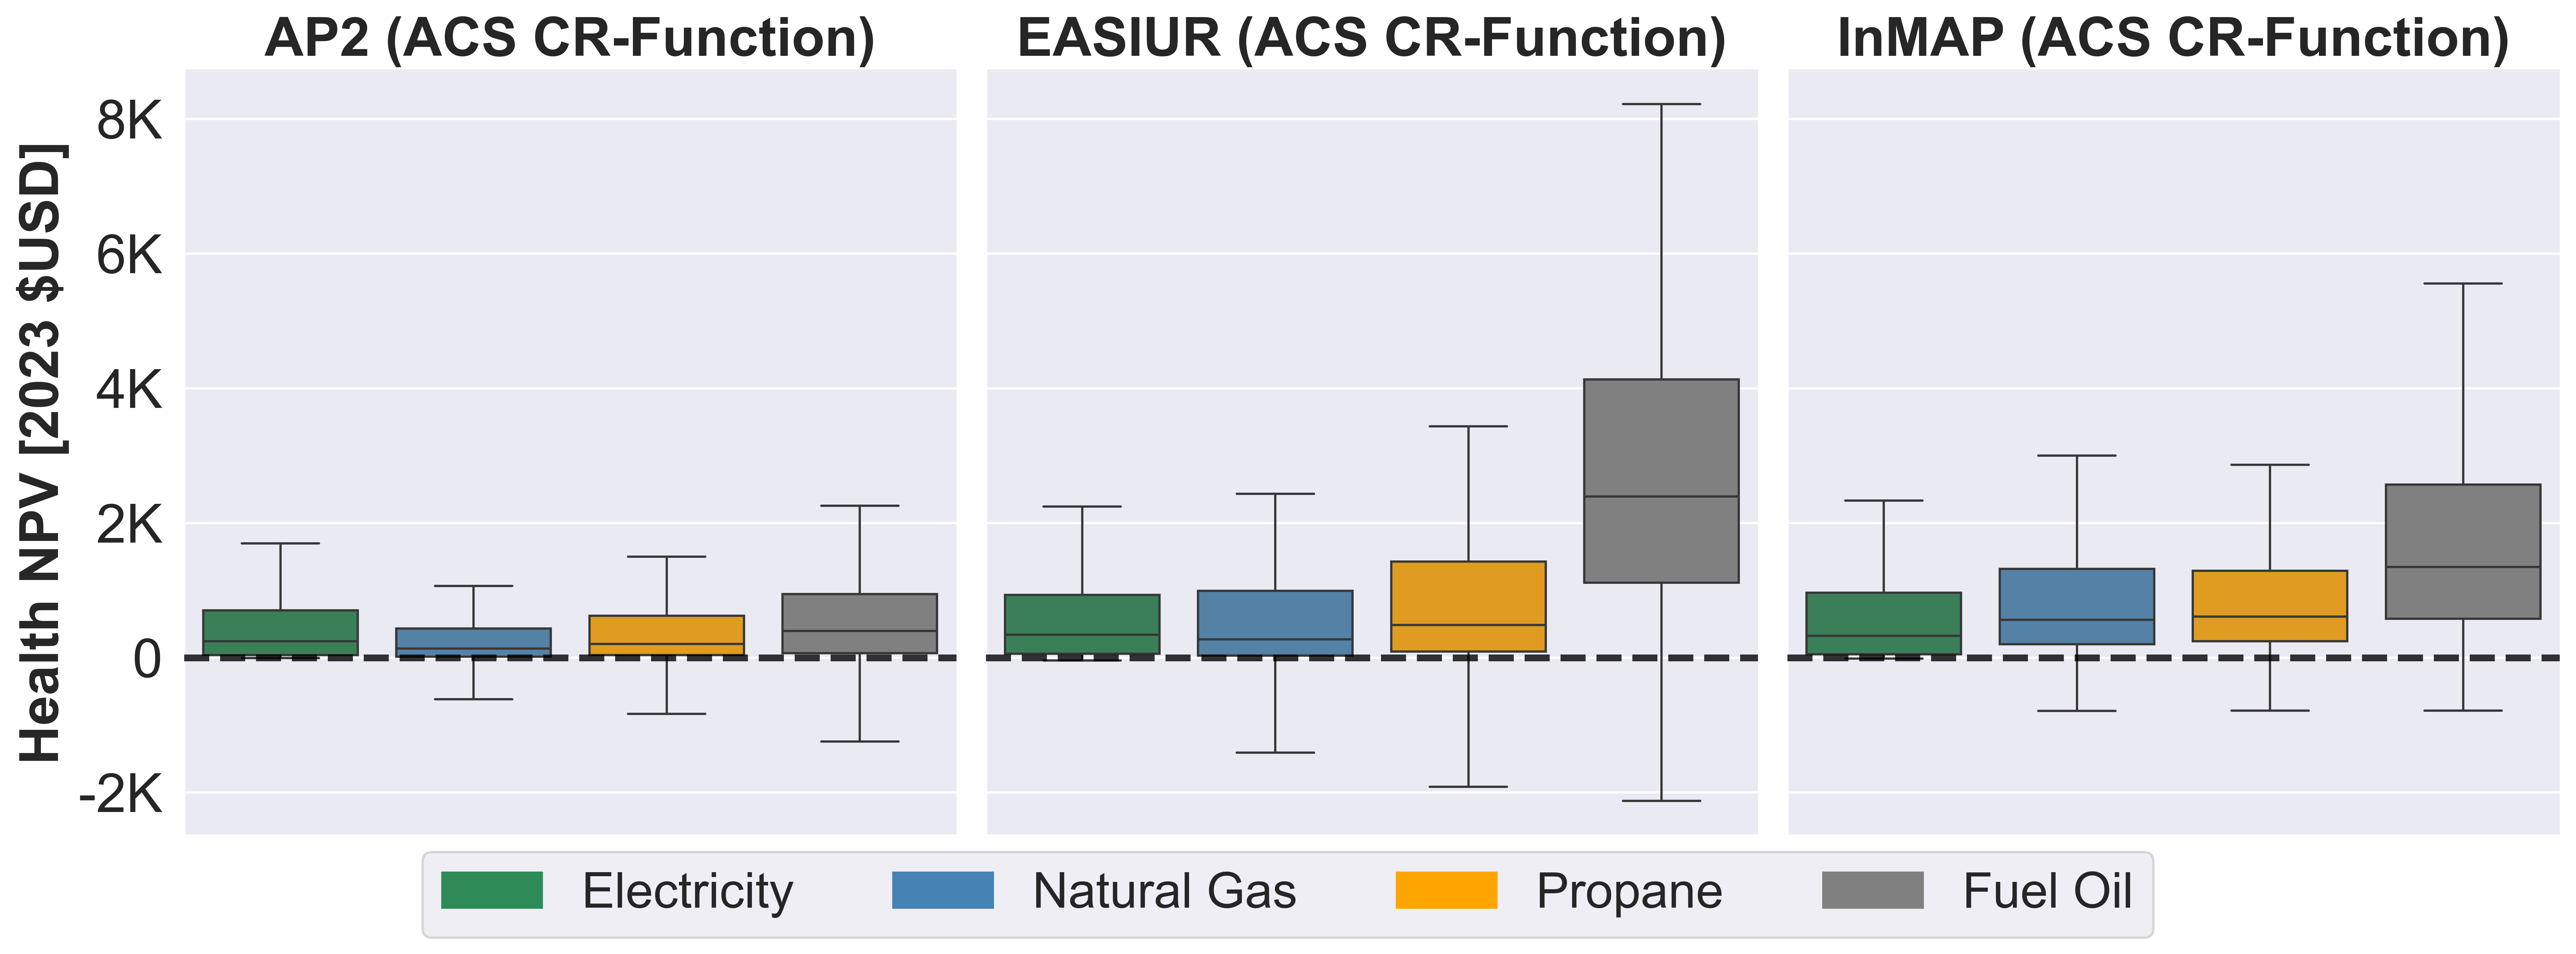

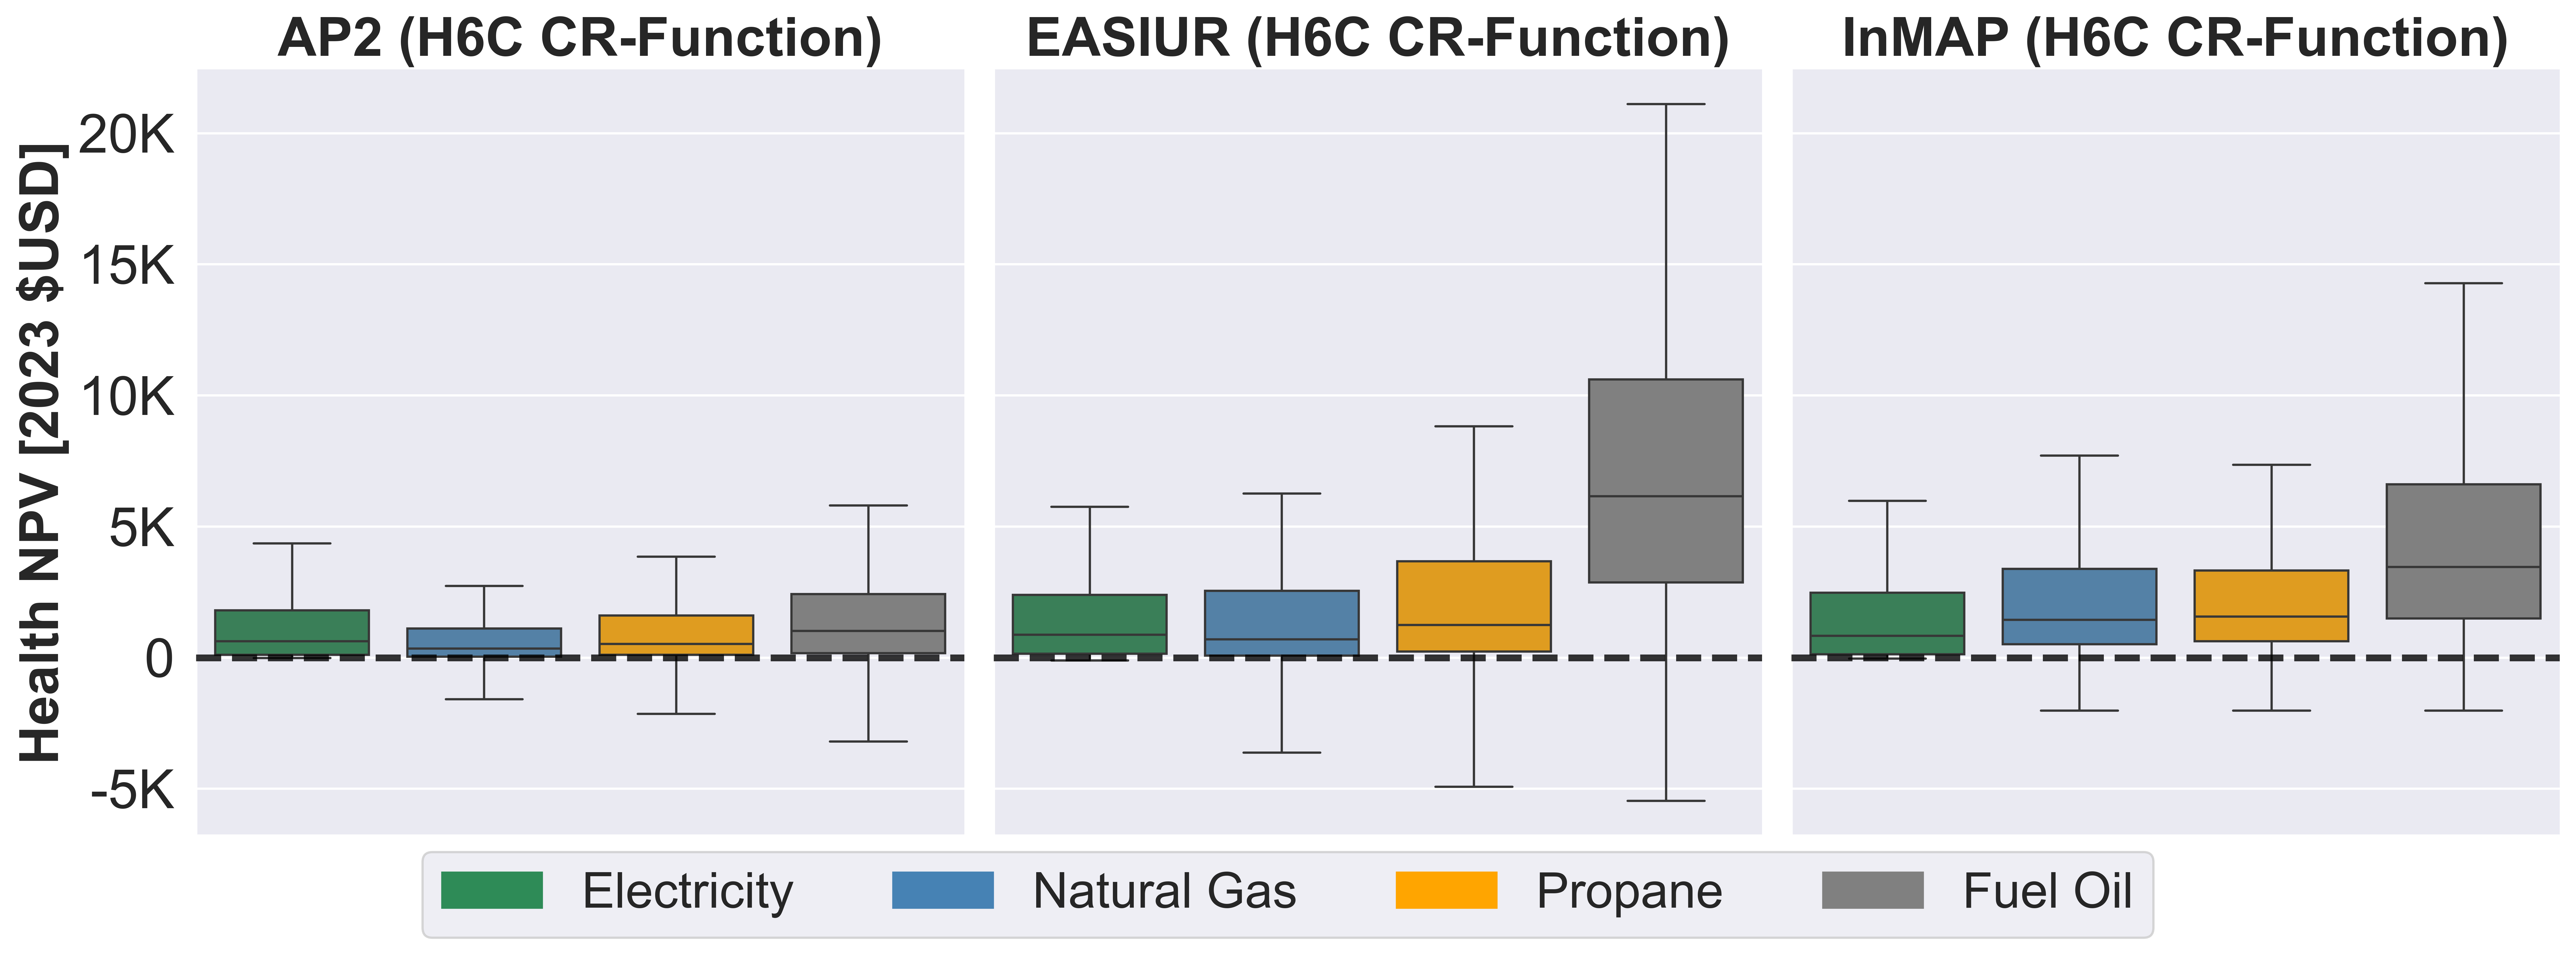

In [120]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_health_npv_acs = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_health_npv_ap2_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_acs'
    ],
    # category_col='urbanicity',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 (ACS CR-Function)', 'EASIUR (ACS CR-Function)', 'InMAP (ACS CR-Function)'],
    x_labels=['', '', ''],
    y_labels=['Health NPV [2023 $USD]', '', ''],
    figure_size=(16, 6),
    show_outliers=False,
    show_xtick_labels=False  # Hide x-tick labels for cleaner look
)

fig_HEATING_health_npv_h6c = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_health_npv_ap2_h6c',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c'
    ],
    # category_col='urbanicity',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 (H6C CR-Function)', 'EASIUR (H6C CR-Function)', 'InMAP (H6C CR-Function)'],
    x_labels=['', '', ''],
    y_labels=['Health NPV [2023 $USD]', '', ''],
    figure_size=(16, 6),
    show_outliers=False,
    show_xtick_labels=False  # Hide x-tick labels for cleaner look
)

In [121]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# print_summary_stats(
#     dataframes=[
#         df_outputs_basic_home_ap2,
#         df_outputs_basic_home_easiur, 
#         df_outputs_basic_home_inmap
#     ],
#     dataframe_indices=[0, 0, 1, 1, 2, 2],  # First 2 columns from df 0, next 2 from df 1, last 2 from df 2
#     column_names=[
#         f'{scenario_prefix}{category}_health_npv_ap2_acs',
#         f'{scenario_prefix}{category}_health_npv_ap2_h6c',
#         f'{scenario_prefix}{category}_health_npv_easiur_acs',
#         f'{scenario_prefix}{category}_health_npv_easiur_h6c',
#         f'{scenario_prefix}{category}_health_npv_inmap_acs',
#         f'{scenario_prefix}{category}_health_npv_inmap_h6c'
#     ],
#     subplot_titles=[
#         'AP2 with ACS CR-Function',
#         'AP2 with H6C CR-Function',
#         'EASIUR with ACS CR-Function', 
#         'EASIUR with H6C CR-Function',
#         'InMAP with ACS CR-Function',
#         'InMAP with H6C CR-Function'
#     ],
#     percentiles=[2.5, 25, 50, 75, 97.5],  # Common percentiles for all
#     fuel_column=f'base_{category}_fuel',
#     by_fuel_type=True
# )

print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur, 
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # First 2 columns from df 0, next 2 from df 1, last 2 from df 2
    column_names=[
        f'{scenario_prefix}{category}_health_npv_ap2_acs',
        f'{scenario_prefix}{category}_health_npv_ap2_h6c',
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        f'{scenario_prefix}{category}_health_npv_inmap_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c'
    ],
    subplot_titles=[
        'AP2 with ACS CR-Function',
        'AP2 with H6C CR-Function',
        'EASIUR with ACS CR-Function', 
        'EASIUR with H6C CR-Function',
        'InMAP with ACS CR-Function',
        'InMAP with H6C CR-Function'
    ],
    fuel_column=f'base_{category}_fuel'
)



===== AP2 with ACS CR-Function =====
All: 85.3% positive (220,735 of 258,671 values)
Electricity: 99.6% positive (72,582 of 72,874 values)
Natural Gas: 79.3% positive (123,194 of 155,277 values)
Propane: 83.6% positive (11,639 of 13,929 values)
Fuel Oil: 80.3% positive (13,320 of 16,591 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 10,174 of 331,531 total dataframe rows (3.1%).
NaN values in column: 72,860 rows (22.0% of dataframe)

===== AP2 with H6C CR-Function =====
All: 85.3% positive (220,899 of 258,946 values)
Electricity: 99.5% positive (72,659 of 73,015 values)
Natural Gas: 79.3% positive (123,282 of 155,411 values)
Propane: 83.6% positive (11,638 of 13,929 values)
Fuel Oil: 80.3% positive (13,320 of 16,591 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 10,174 of 331,531 total dataframe rows (3.1%).
NaN values in column: 72,585 rows (21.9% of dataframe)

===== EASIUR with ACS CR-Function =====
All: 90.3% positive (233,78

In [1]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

print_summary_stats(
    df=df_outputs_basic_home_easiur,
    column_names=[
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        ],
    subplot_titles=[
        'EASIUR with ACS CR-Function',
        'EASIUR with H6C CR-Function'
        ],
    )

NameError: name 'print_summary_stats' is not defined

In [32]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

print_summary_stats(
    df=df_outputs_basic_home_inmap,
    column_names=[
        f'{scenario_prefix}{category}_health_npv_inmap_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c',
        ],
    subplot_titles=[
        'InMAP with ACS CR-Function',
        'InMAP with H6C CR-Function'
        ],
    )


===== InMAP with ACS CR-Function =====
All Data:
count    258819.000000
mean       1077.588435
std        1898.394862
min       -8157.110000
25%         153.730000
50%         527.600000
75%        1323.960000
max       98257.250000
Name: iraRef_mp8_heating_health_npv_inmap_acs, dtype: float64

Missing Values: 72,712 (21.9%)

===== InMAP with H6C CR-Function =====
All Data:
count    259058.000000
mean       2766.076107
std        4876.031676
min      -20957.840000
25%         393.002500
50%        1353.120000
75%        3398.627500
max      252455.210000
Name: iraRef_mp8_heating_health_npv_inmap_h6c, dtype: float64

Missing Values: 72,473 (21.9%)


# SENSITIVITY ANALYSIS: Private NPV with Tenure and LMI Status

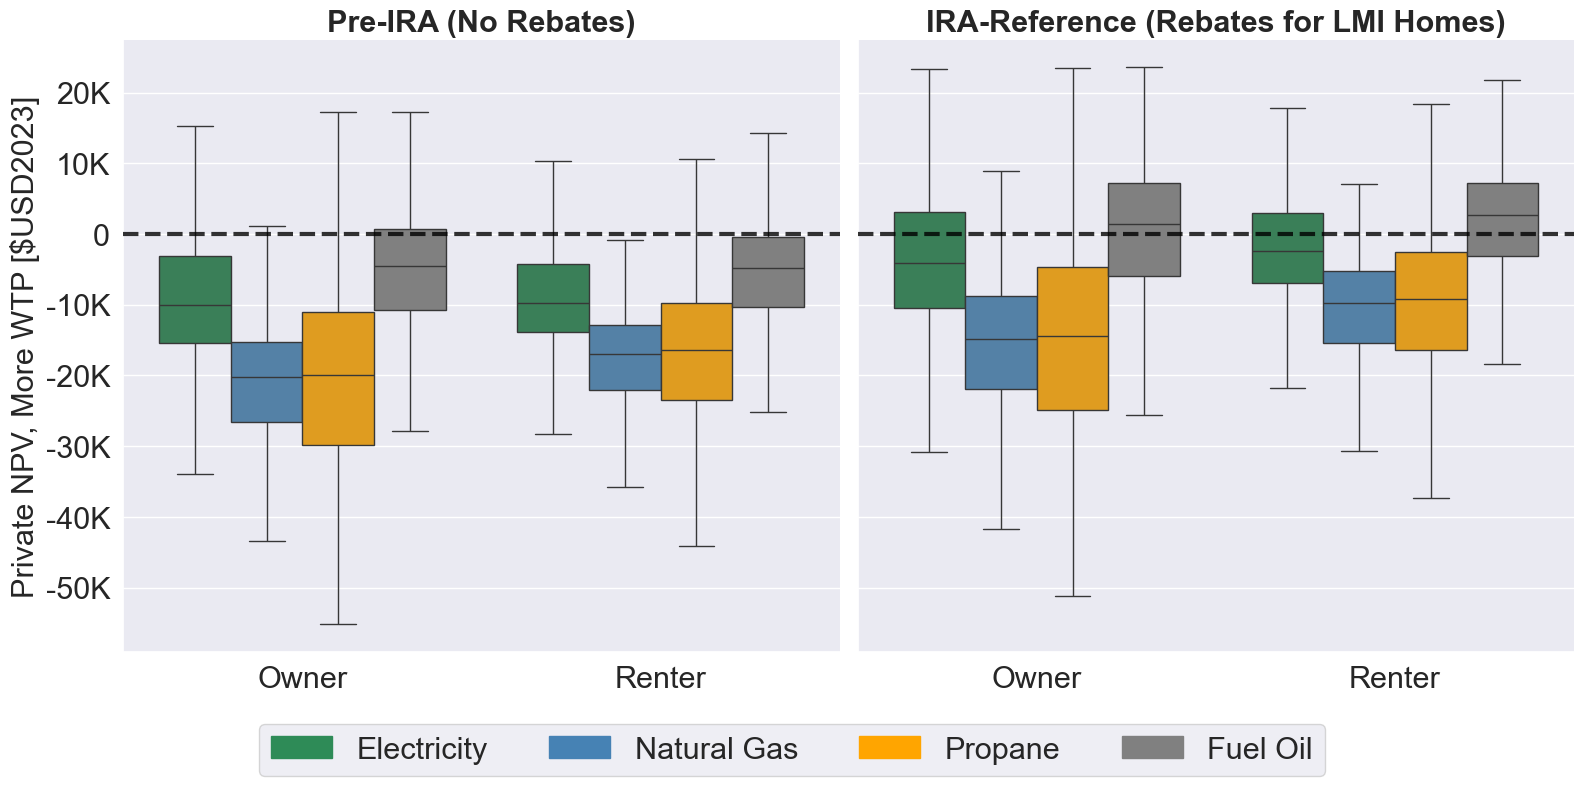

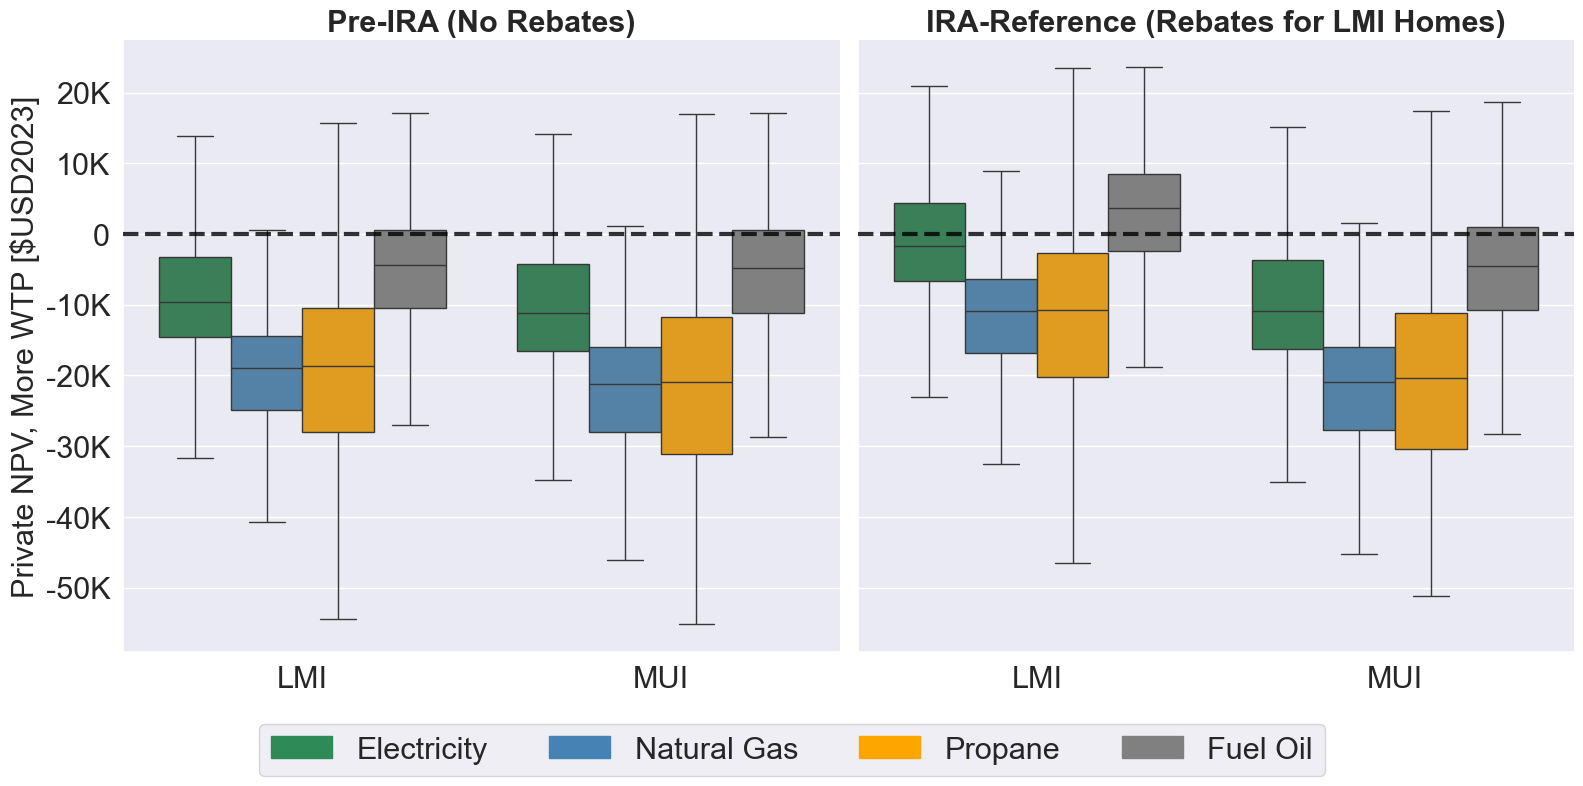

In [33]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_private_more_WTP_tenure = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='tenure',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
    # show_legend=False
)

fig_HEATING_private_more_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
    # show_legend=False
)

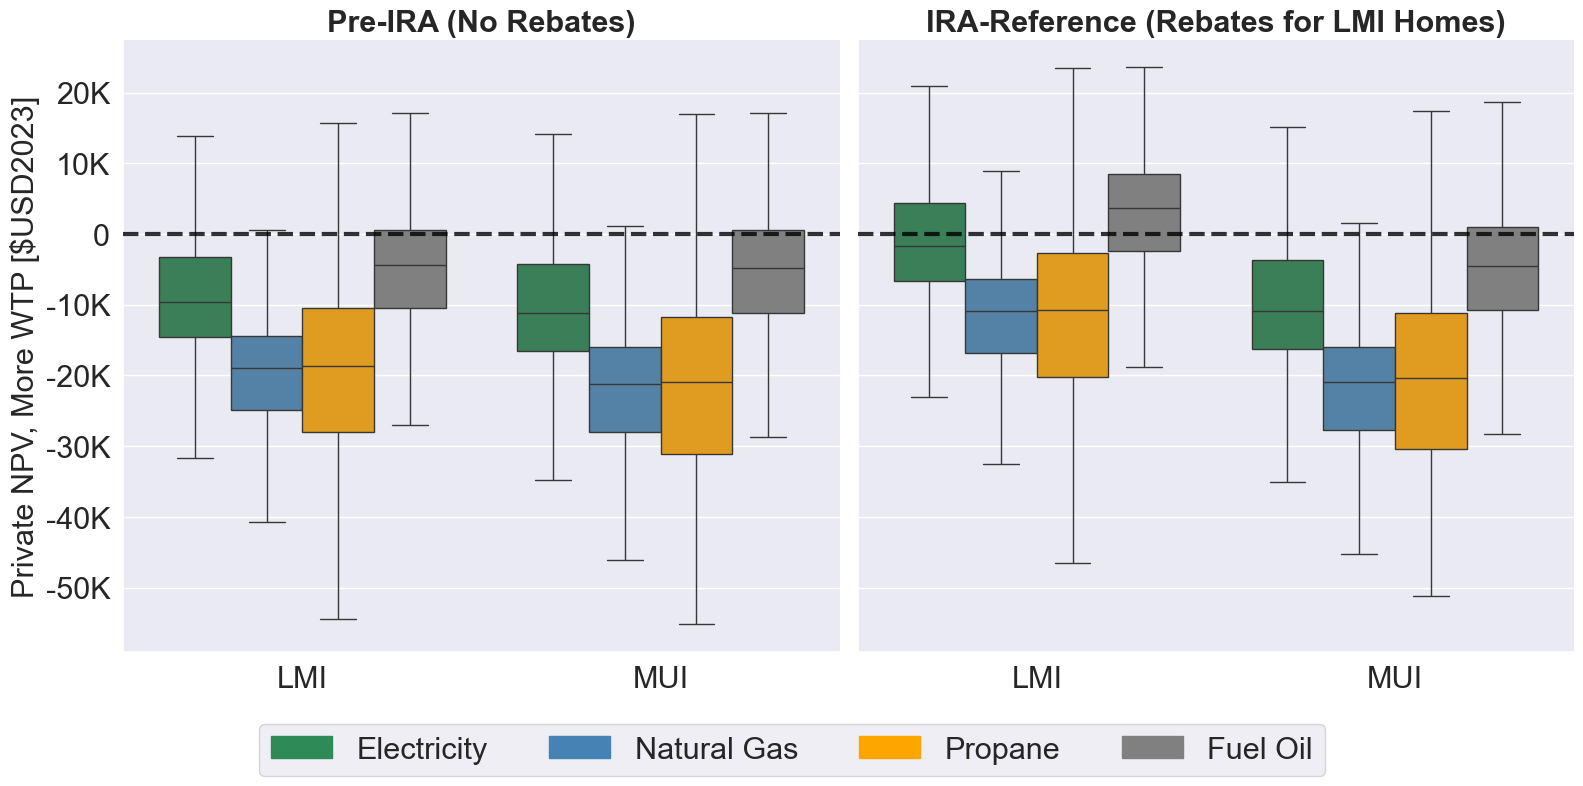

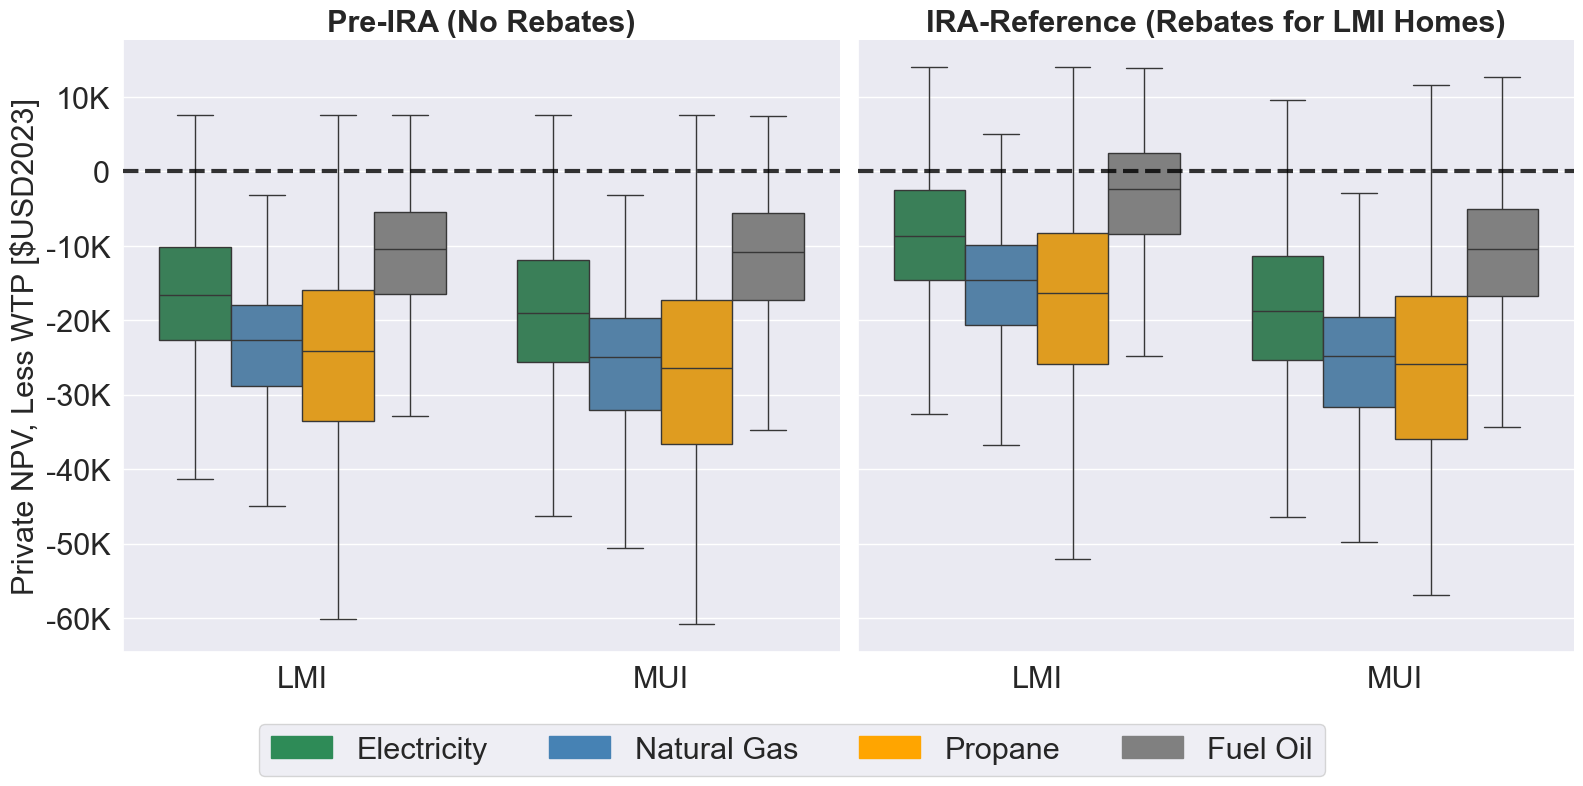

In [34]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_private_more_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
)

fig_HEATING_private_less_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_lessWTP',
        f'iraRef_mp8_{category}_private_npv_lessWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, Less WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
)


# Model Runtime

In [35]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 390 minutes and 11 seconds to execute.
